In [362]:
import pandas as pd
import requests
import json
import seaborn as sns
import matplotlib.pyplot as plt

In [364]:
# Constants
api_key = "ZOC333QF0ZHXU5YD"
series = "TIME_SERIES_DAILY"
request_url = "https://www.alphavantage.co/query"
d_address = 'Data/Deaths.csv'
c_address = 'Data/Confirmed.csv'

In [359]:
def fetch_stock_values(symbol):
    query_params = {
        'function' : series,
        'symbol' : symbol,
        'apikey': api_key
    }
    headers = {
        'User-Agent': 'XY',
        'Content-type': 'application/json'
    }
    response = requests.get(request_url, headers=headers, params=query_params)
    return response.text if response.status_code == 200 else "Something went wrong"

In [366]:
# SPDR S&P 500 ETF Trust
spy_json = json.loads(fetch_stock_values(symbol='spy'))
sdf = pd.DataFrame(spy_json['Time Series (Daily)']).astype(float)
spy_df = sdf.drop(['1. open','4. close','5. volume'],axis=0)
spy = spy_df.rename({'2. high' : 'high', '3. low' : 'low'})

In [367]:
# Zoom Video Communications Inc
zm_json = json.loads(fetch_stock_values(symbol='ZM'))
zdf = pd.DataFrame(zm_json['Time Series (Daily)']).astype(float)
zm_df = zdf.drop(['1. open','4. close','5. volume'],axis=0)
zm = zm_df.rename({'2. high' : 'high', '3. low' : 'low'})

In [368]:
# Delta Air Lines, Inc
dal_json = json.loads(fetch_stock_values(symbol='DAL'))
ddf = pd.DataFrame(dal_json['Time Series (Daily)']).astype(float)
dal_df = ddf.drop(['1. open','4. close','5. volume'],axis=0)
dal = dal_df.rename({'2. high' : 'high', '3. low' : 'low'})

In [369]:
# Annaly Capital Management, Inc
nly_json = json.loads(fetch_stock_values(symbol='NLY'))
ndf = pd.DataFrame(nly_json['Time Series (Daily)']).astype(float)
nly_df = ndf.drop(['1. open','4. close','5. volume'],axis=0)
nly = nly_df.rename({'2. high' : 'high', '3. low' : 'low'})

In [370]:
# GOLD
gld_json = json.loads(fetch_stock_values(symbol='GOLD'))
gdf = pd.DataFrame(gld_json['Time Series (Daily)']).astype(float)
gld_df = gdf.drop(['1. open','4. close','5. volume'],axis=0)
gld = gld_df.rename({'2. high' : 'high', '3. low' : 'low'})

In [371]:
spy_tp_df = spy.T
zm_tp_df = zm.T
dal_tp_df = dal.T
nly_tp_df = nly.T
gld_tp_df = gld.T

In [372]:
# spy_tp_df.index.name = 'Date'
spy_tp_df.rename_axis('Date', inplace=True)
spy_tp_df

,high,low
Date,,
2022-04-25,428.6900,418.8400
2022-04-22,438.0825,425.4400
2022-04-21,450.0100,437.1000
2022-04-20,447.5700,443.4800
2022-04-19,445.8000,437.6800
...,...,...
2021-12-07,468.8800,458.6546
2021-12-06,460.7900,453.5600
2021-12-03,460.3000,448.9200


In [373]:
deaths_data = pd.read_csv(d_address, index_col=False)
deaths_data['Date'] = pd.to_datetime(deaths_data['Date'], errors='coerce', utc=True)
deaths_data['Date'] = deaths_data['Date'].values[::-1]
deaths_data['Deaths'] = deaths_data['Deaths'].values[::-1]
deaths_data.set_index('Date', inplace=True)
deaths_data

,Deaths
Date,
2022-04-25,38885
2022-04-24,38878
2022-04-23,38853
2022-04-22,38801
2022-04-21,38696
...,...
2020-01-26,0
2020-01-25,0
2020-01-24,0


In [ ]:
# COVID Confirmed
confirmed = pd.read_csv(c_address)
confirmed_df = confirmed.dropna(axis=0,how='all')

# COVID Deaths
deaths = pd.read_csv(d_address)
death_df = deaths.dropna(axis=0,how='all')

In [378]:
# # Plotting Confirmed Cases
# confirmed_df.plot.line(figsize=(15,8))
# plt.title("Covid Confirmed Cases")
#
# # Plotting Deaths
# death_df.plot.line(figsize=(15,8))
# plt.title("Covid Deaths")

# Plotting High-Low value
# spy_tp_df.plot.line(figsize=(15,8))
# deaths_data.plot.line(figsize=(15,8))
# plt.title("SPDR S&P 500 ETF Trust")

# df1 = pd.DataFrame({'x': deaths_data['Date'], 'y1': deaths_data['Deaths'], 'type': 'a'})
# df2 = pd.DataFrame({'x': spy_tp_df, 'y2': spy_tp_df["high"], 'type': 'b'})

# fig, ax = plt.subplots(figsize=(5, 5))
#
# sns.lineplot(data=spy_tp_df, x=spy_tp_df['Date'], y='y1', label='a', ax=ax)
# sns.lineplot(data=spy_tp_df, x='x', y='y1', label='a', ax=ax)
# sns.lineplot(data=deaths_data, x='x', y='y2', label='b', ax=ax)
#
# ax = spy_tp_df.plot(y='high', figsize=(15,8))
# deaths_data.plot(x='Date', ax=ax)
# d_new = pd.merge(spy_tp_df, deaths_data, left_index=True, right_index=True)
d_new = pd.concat([spy_tp_df, deaths_data], axis=1)

In [388]:
d_new

,high,low,Deaths
Date,,,
2022-04-25,428.6900,418.84,NaN
2022-04-22,438.0825,425.44,NaN
2022-04-21,450.0100,437.10,NaN
2022-04-20,447.5700,443.48,NaN
2022-04-19,445.8000,437.68,NaN
...,...,...,...
2020-01-26 00:00:00,NaN,NaN,0.0
2020-01-25 00:00:00,NaN,NaN,0.0
2020-01-24 00:00:00,NaN,NaN,0.0


In [390]:
d_new['Timestamp'] = d_new.index
d_new

,high,low,Deaths,Timestamp
Date,,,,
2022-04-25,428.6900,418.84,NaN,2022-04-25
2022-04-22,438.0825,425.44,NaN,2022-04-22
2022-04-21,450.0100,437.10,NaN,2022-04-21
2022-04-20,447.5700,443.48,NaN,2022-04-20
2022-04-19,445.8000,437.68,NaN,2022-04-19
...,...,...,...,...
2020-01-26 00:00:00,NaN,NaN,0.0,2020-01-26 00:00:00
2020-01-25 00:00:00,NaN,NaN,0.0,2020-01-25 00:00:00
2020-01-24 00:00:00,NaN,NaN,0.0,2020-01-24 00:00:00


<AxesSubplot:xlabel='Timestamp', ylabel='high'>

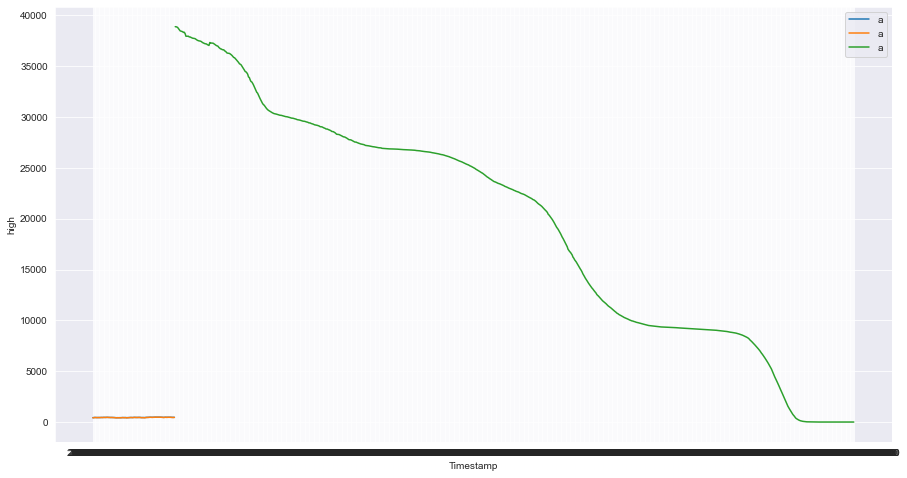

In [393]:
fig, ax = plt.subplots(figsize=(15, 8))

sns.lineplot(data=d_new, x=d_new['Timestamp'].astype(str), y=d_new['high'], label='a', ax=ax)
sns.lineplot(data=d_new, x=d_new['Timestamp'].astype(str), y=d_new['low'], label='a', ax=ax)
sns.lineplot(data=d_new, x=d_new['Timestamp'].astype(str), y=d_new['Deaths'], label='a', ax=ax)

In [ ]:
# Plotting Confirmed Cases
confirmed_df.plot.line(figsize=(15,8))
plt.title("Covid Confirmed Cases")

# Plotting Deaths
death_df.plot.line(figsize=(15,8))
plt.title("Covid Deaths")

# Plotting High-Low value
zm_tp_df.plot.line(figsize=(15,8))
plt.title("Zoom")

In [ ]:
# Plotting Confirmed Cases
confirmed_df.plot.line(figsize=(15,8))
plt.title("Covid Confirmed Cases")

# Plotting Deaths
death_df.plot.line(figsize=(15,8))
plt.title("Covid Deaths")

# Plotting High-Low value
dal_tp_df.plot.line(figsize=(15,8))
plt.title("Delta Air Lines, Inc")

In [ ]:
# Plotting Confirmed Cases
confirmed_df.plot.line(figsize=(15,8))
plt.title("Covid Confirmed Cases")

# Plotting Deaths
death_df.plot.line(figsize=(15,8))
plt.title("Covid Deaths")

# Plotting High-Low value
nly_tp_df.plot.line(figsize=(15,8))
plt.title("Annaly Capital Management, Inc")

In [ ]:
# Plotting Confirmed Cases
confirmed_df.plot.line(figsize=(15,8))
plt.title("Covid Confirmed Cases")

# Plotting Deaths
death_df.plot.line(figsize=(15,8))
plt.title("Covid Deaths")

# Plotting High-Low value
gld_tp_df.plot.line(figsize=(15,8))
plt.title("GOLD")